In [1]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from gcsa.recurrence import Recurrence, DAILY, SU, SA

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime, timedelta, date
import dateutil
from dateutil.parser import parse
import calendar
import numpy as np
from circle_cal import Year_Data
import circle_cal as cc

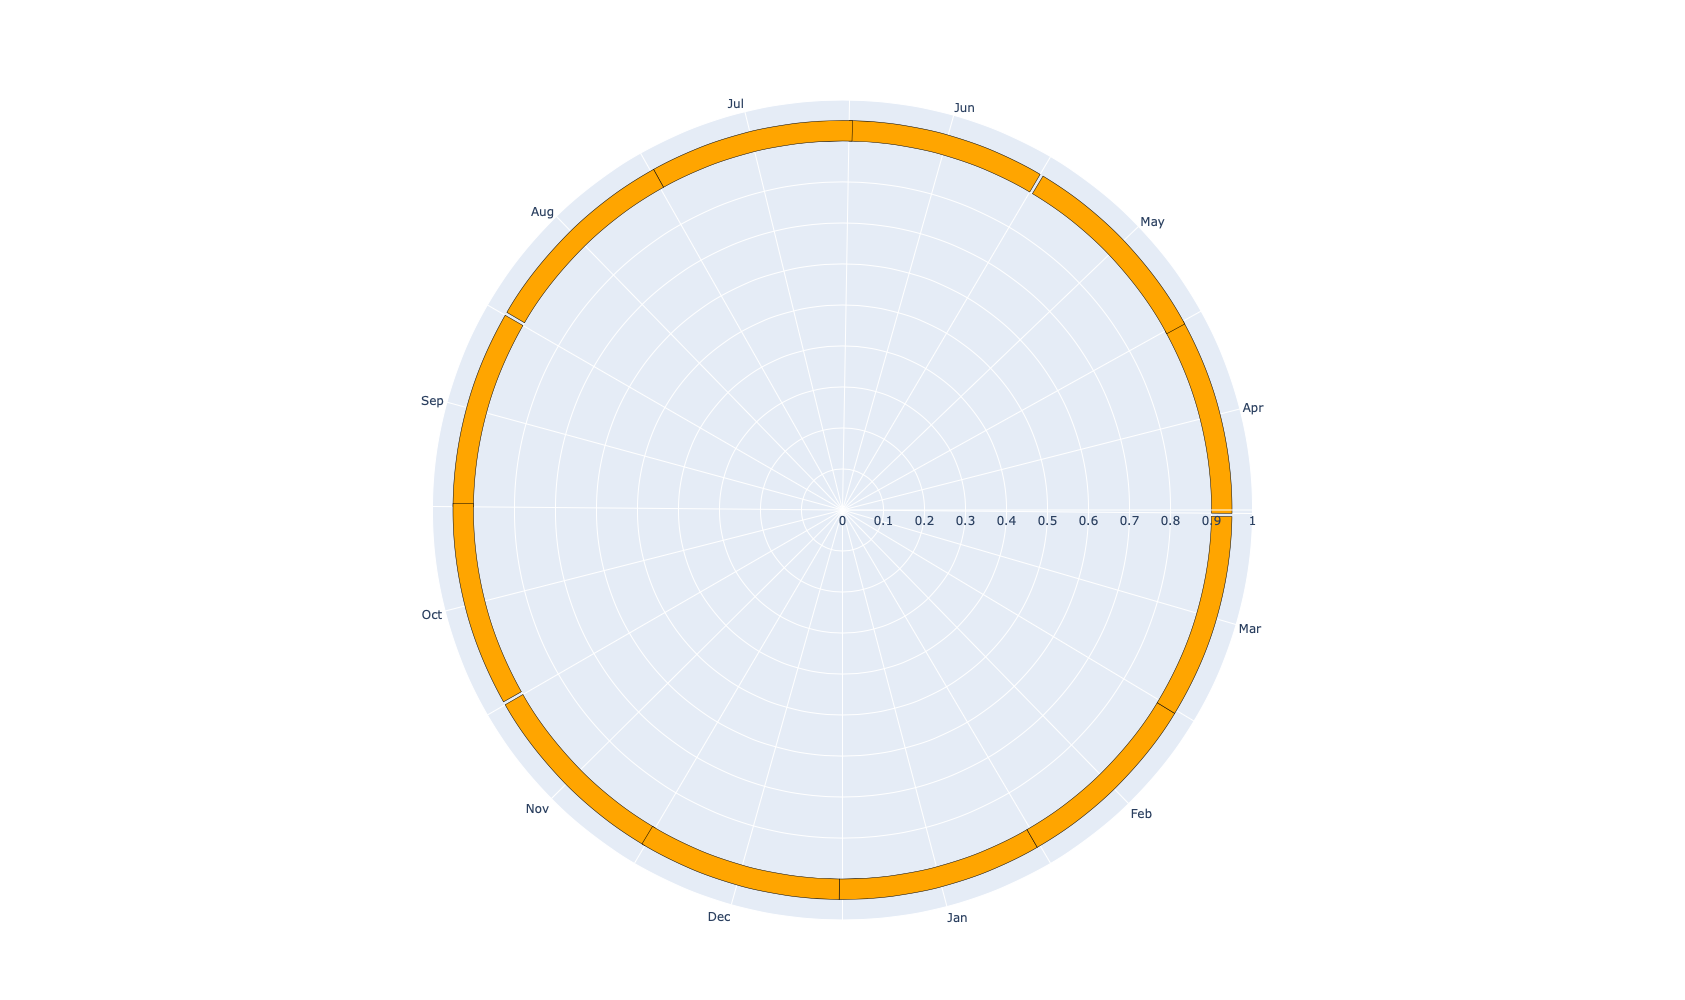

In [14]:
y=Year_Data(2024)
d_to_degree = 360 / len(y)

months = [date(y.year, i, 1) for i in range(1,13)] + [date(y.year+1, 1, 1)]
theta, width = cc.events_to_polar(months, days_to_theta = d_to_degree)
minor_ticks = [d_to_degree * y.int_from_date(date(y.year, m, 1)) for m in range(1,13)]


fig = go.Figure()
fig.add_trace(go.Barpolar(base=[.9] * 12, r=[.05] * 12,
                          theta=theta,
                          width=width,
                          marker_color="orange",
                          marker_line_color="black",
                          )
              )
tickvals = []
for u, v in zip(theta, minor_ticks):
    tickvals.append(u)
    tickvals.append(v)
ticktext = []
for m in calendar.month_abbr[1:]:
    ticktext.append(m)
    ticktext.append("")

fig.update_polars(
    dict(
        angularaxis=dict(
            rotation=-90,
            tickmode="array",
            tickvals=tickvals,
            ticktext=ticktext
        ),
    ),
    #margin = dict(t=0, l=0, r=0, b=0),
)
fig.update_layout(dict(height=1000))
fig.show()

In [12]:
fig.layout

Layout({
    'height': 1000,
    'polar': {'angularaxis': {'rotation': -90,
                              'tickmode': 'array',
                              'ticktext': [Jan, None, Feb, None, Mar, None, Apr,
                                           None, May, None, Jun, None, Jul, None,
                                           Aug, None, Sep, None, Oct, None, Nov,
                                           None, Dec, None],
                              'tickvals': []}},
    'template': '...'
})

In [15]:
d_to_degree

0.9836065573770492